<a href="https://colab.research.google.com/github/CVBhanuPrakash/2WheelerAccidentDataAnalytics/blob/main/ICPS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [18]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score
import matplotlib.pyplot as plt
import seaborn as sns

# Load the CSV data
accident_data = pd.read_csv('/content/accident_data.csv')
road_condition_data = pd.read_csv('/content/road_condition_data.csv')
traffic_patterns_data = pd.read_csv('/content/traffic_patterns_data.csv')
weather_data = pd.read_csv('/content/weather_data.csv')
rider_behavior_data = pd.read_csv('/content/rider_behavior_data.csv')

In [19]:
# Merge the dataframes
data = pd.merge(accident_data, road_condition_data, on='Location')
data = pd.merge(data, traffic_patterns_data, on='Location')
data = pd.merge(data, weather_data, on='Location')
data = pd.merge(data, rider_behavior_data, on='Location')

# Feature selection and preprocessing
features = data[['Road Type', 'Road Quality', 'Potholes', 'Construction Zone',
                 'Traffic Volume', 'Congestion Level', 'Speed Limit',
                 'Temperature (°F)', 'Precipitation (inches)', 'Visibility (miles)',
                 'Wind Conditions', 'Helmet Usage', 'Speed (mph)', 'Violations']]
target = data['Severity']

Accuracy: 0.72
Precision: 0.72


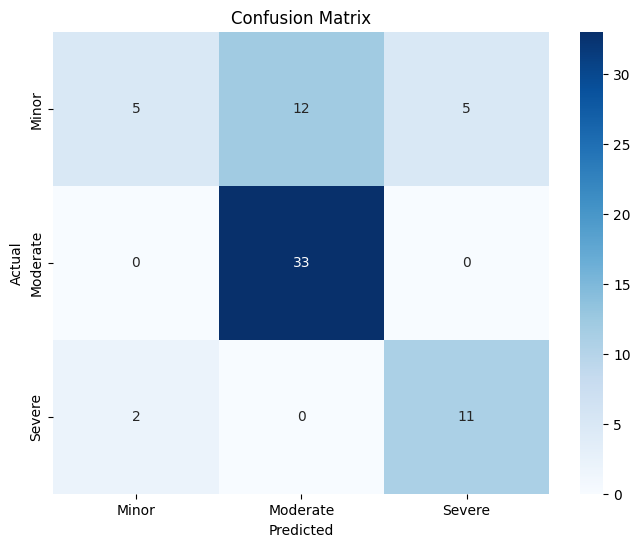

In [20]:
# One-hot encoding for categorical variables
features = pd.get_dummies(features)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Train a Random Forest Classifier
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)

# Make predictions
y_pred = clf.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
confusion = confusion_matrix(y_test, y_pred)

print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")

# Visualize the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confusion, annot=True, fmt='d', cmap='Blues', xticklabels=clf.classes_, yticklabels=clf.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

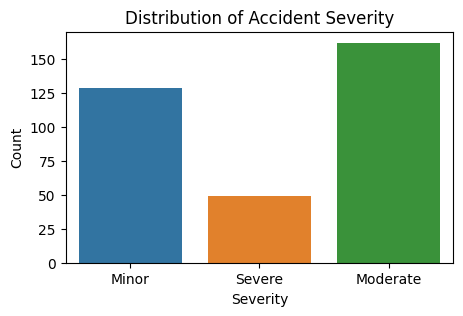

<ipython-input-25-eac27c6d8ced>:11: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = data.corr()


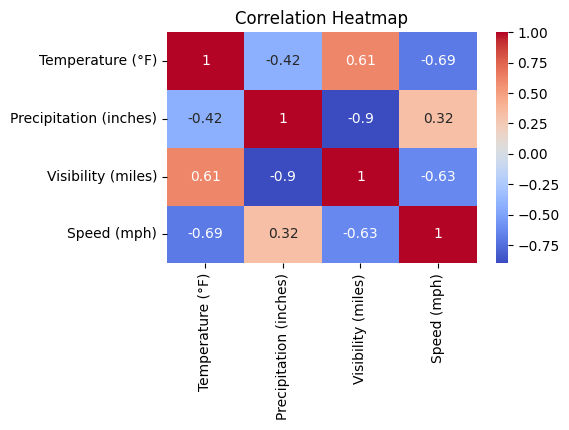

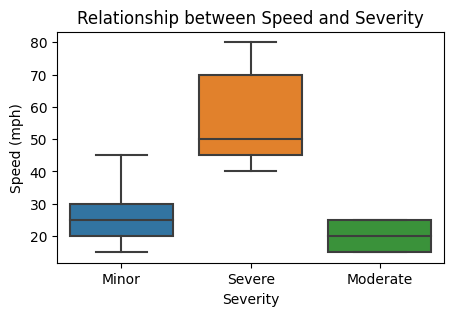

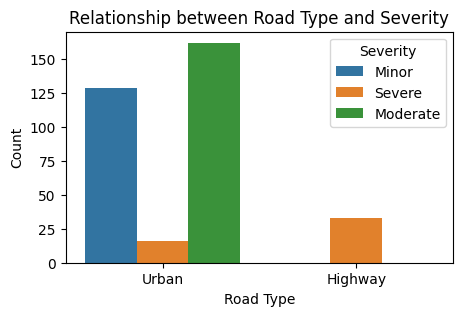

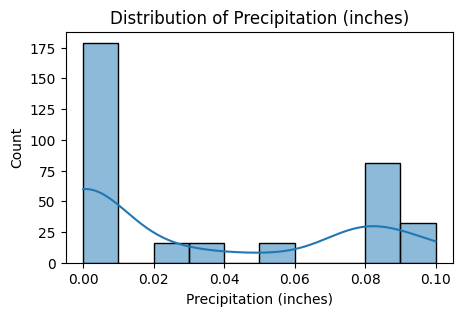

In [25]:
# Distribution of Severity
plt.figure(figsize=(5, 3))
sns.countplot(x='Severity', data=data)
plt.title('Distribution of Accident Severity')
plt.xlabel('Severity')
plt.ylabel('Count')
plt.show()
print("        ")

# Correlation Heatmap
correlation_matrix = data.corr()
plt.figure(figsize=(5, 3))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()
print("        ")

# Relationship between Speed and Severity
plt.figure(figsize=(5, 3))
sns.boxplot(x='Severity', y='Speed (mph)', data=data)
plt.title('Relationship between Speed and Severity')
plt.xlabel('Severity')
plt.ylabel('Speed (mph)')
plt.show()
print("        ")

# Relationship between Road Type and Severity
plt.figure(figsize=(5, 3))
sns.countplot(x='Road Type', hue='Severity', data=data)
plt.title('Relationship between Road Type and Severity')
plt.xlabel('Road Type')
plt.ylabel('Count')
plt.legend(title='Severity')
plt.show()
print("        ")

# Precipitation Distribution
plt.figure(figsize=(5, 3))
sns.histplot(data['Precipitation (inches)'], kde=True)
plt.title('Distribution of Precipitation (inches)')
plt.xlabel('Precipitation (inches)')
plt.ylabel('Count')
plt.show()

